**Group : 1**

**COCOMA REYES, David Leonardo**

**DEJEAN, Maxime**

## Advice
### Work
- **Read the whole subject before starting**
- Search for the documentation (Google) before asking a teacher
- The work will be evaluated based on this notebook:
    - Answer questions in the notebook.
    - Insert your code here and execute it so that the output stays displayed for the teacher.

### ChatGPT
- You can use ChatGPT ONLY to answer specific questions, get introductory explanations on machine learning libraries, get example codes. Be aware that there is no guaranty in the answer of ChatGPT (even with the paying licence).
- Do not use ChatGPT to work in your stead ! The goal is for you to learn the manipulation of machine learning basic methods yourself. Teachers are used to look at student's works and ChatGPT is not good to fake it.
=> In case of a doubt of ChatGPT use (or plagiarism between groups), the students will be summoned and evaluated on an oral presentation.

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP) (slide 53 of the slides)

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [31]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [32]:
# Preprocessing: scale input data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [33]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [34]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

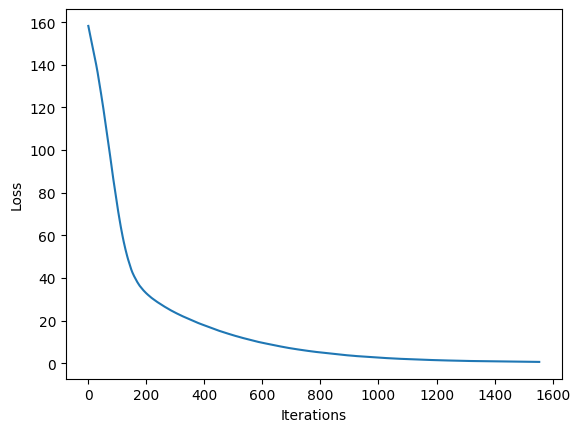

In [35]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3276\3963429337.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')


Text(0, 0.5, 'f(examples)')

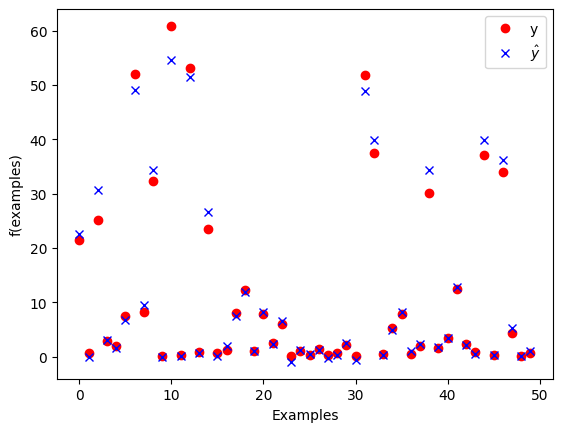

In [36]:
# Plot the results
num_samples_to_plot = 50
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?

Its a Multi-layer Perceptron regressor. This model optimizes the squared error using LBFGS or stochastic gradient descent.
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?

The algorithm uses by default the solver 'adam' and it refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba but for in the courses we qre using a clasic stochastic gradient-based optimize wich can be used with the solver ‘sgd’ that refers to stochastic gradient descent.
- How does the training algorithm decides to stop the training?

We can define the max iterations in the begining to limit the learning if its not converging, but the solver iterates until the loss value its smaller than ‘tol’ wich is a tolfloat that we can configure but seted by default at 1e-4 or when the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [37]:
# clean all previously defined variables for the sailing boats
%reset -f

In [49]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


num_samples = 2000

cal_housing = fetch_california_housing()
print(type(cal_housing))
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = cal_housing.target

X_all, y_all = shuffle(X_all, y_all, random_state=42)

# only use the first N samples to limit training time
X, Y = X_all[:num_samples], y_all[:num_samples]


X.head(10) # print the first 10 values


<class 'sklearn.utils._bunch.Bunch'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
13311,4.7147,12.0,5.251483,0.975089,2400.0,2.846975,34.08,-117.61
7113,5.0839,36.0,6.221719,1.095023,670.0,3.031674,33.89,-118.02
7668,3.6908,38.0,4.962825,1.048327,1011.0,3.758364,33.92,-118.08
18246,4.8036,4.0,3.924658,1.035959,1050.0,1.797945,37.39,-122.08
5723,8.1132,45.0,6.879056,1.011799,943.0,2.781711,34.18,-118.23


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [40]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #fit calcule le u et le s; transform l'applique
x_test = sc.transform(x_test)  #pas besoin de refit car sinon on aura pas les memes transform de test et train

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

Train score:  0.9008164420623441
Test score:   0.6792262926983907


Text(0, 0.5, 'Loss')

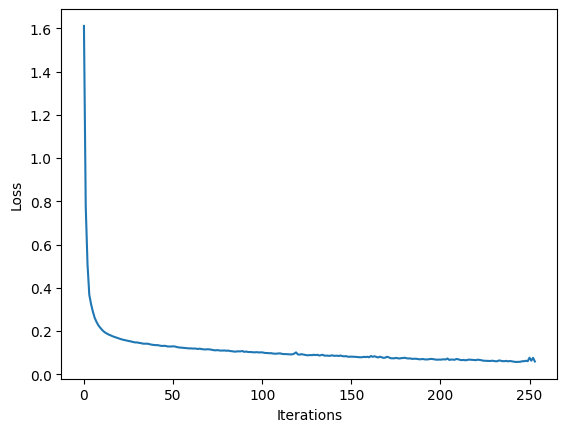

In [41]:
# TODO
mlp = MLPRegressor(hidden_layer_sizes=(200,100),max_iter=3000, solver='adam',tol=0.0001, random_state=1) # define the model
mlp.fit(x_train, y_train) # train the MLP

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")

#on a de l'overfitting test score << train score car complexité du réseau (2 hidden layers de grande dimensions) trop importantes
#par rapport au nombre de paramètres et la taille du dataset utilisé

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.
**Explore 10 different configurations**.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time

Two constraints:
1) Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
2) Set up an automatization in the way your run your experiments and collect data. For each run, the output must stay displayed in the notebook, and you should record the parameters and results into an external data structure. **The structure *data* can typically be used for automatization and storing !**

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [42]:
# TODO
mlp = MLPRegressor(hidden_layer_sizes=(200,100),max_iter=3000, solver='adam',tol=0.0001, random_state=1) # define the model
mlp.fit(x_train, y_train) # train the MLP
print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))

Train score:  0.9008164420623441
Test score:   0.6792262926983907


In [43]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
data = []
data.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 500})
data.append({'hidden_layer_sizes': (100,50), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 500})
data.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.0025, 'max_iter': 300})
data.append({'hidden_layer_sizes': (200,100),'activation': 'tanh', 'learning_rate_init': 0.001, 'max_iter': 500})
data.append({'hidden_layer_sizes': (100,50), 'activation': 'tanh', 'learning_rate_init': 0.001, 'max_iter': 500})
data.append({'hidden_layer_sizes': (120,60), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 250})
data.append({'hidden_layer_sizes': (150,100),'activation': 'tanh', 'learning_rate_init': 0.003, 'max_iter': 250})
data.append({'hidden_layer_sizes': (100,50), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 300})
data.append({'hidden_layer_sizes': (200,100), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 400})
data.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.002, 'max_iter': 300})

for d in data :
    mlp = MLPRegressor(hidden_layer_sizes=d['hidden_layer_sizes'],
                       activation = d['activation'],
                       max_iter=d['max_iter'],
                       learning_rate_init = d['learning_rate_init'],
                       random_state=1
                      )
    mlp.fit(x_train, y_train) # train the MLP
    d['test_score'] = mlp.score(x_test, y_test)
    d['train_score'] = mlp.score(x_train, y_train)
table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,hidden_layer_sizes,activation,learning_rate_init,max_iter,test_score,train_score
9,"(200, 100)",relu,0.0020,300,0.686012,0.923146
7,"(100, 50)",tanh,0.0020,300,0.685585,0.823389
4,"(100, 50)",tanh,0.0010,500,0.684749,0.844055
8,"(200, 100)",tanh,0.0020,400,0.681640,0.894345
0,"(200, 100)",relu,0.0010,500,0.679226,0.900816
3,"(200, 100)",tanh,0.0010,500,0.678554,0.817783
1,"(100, 50)",relu,0.0010,500,0.677359,0.897991
6,"(150, 100)",tanh,0.0030,250,0.676798,0.887077
5,"(120, 60)",tanh,0.0020,250,0.651305,0.823932
2,"(200, 100)",relu,0.0025,300,0.623068,0.951110


## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

The best model correspond to the one using the relu activation function, with 200 neurons in the first hidden layer, 100 neurons in the second, and a learning rate of 0.002, with a train score of 0.923 and the highest score in test with 0.686

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection. Note that only 2000 samples were used from the full california_housing dataset, there are a lot of remaining (see data loading at the beginning)...

In [44]:
X2, Y2 = X_all[num_samples:2*num_samples], y_all[num_samples:2*num_samples]
x_test1, x_test2, y_test1, y_test2 = train_test_split(X2, Y2,random_state=1, test_size = 0.5)
x_test1 = sc.transform(x_test1)

In [55]:
data2 = []
data2.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 500})
data2.append({'hidden_layer_sizes': (100,50), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 500})
data2.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.0025, 'max_iter': 300})
data2.append({'hidden_layer_sizes': (200,100),'activation': 'tanh', 'learning_rate_init': 0.001, 'max_iter': 500})
data2.append({'hidden_layer_sizes': (100,50), 'activation': 'tanh', 'learning_rate_init': 0.001, 'max_iter': 500})
data2.append({'hidden_layer_sizes': (120,60), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 250})
data2.append({'hidden_layer_sizes': (150,100),'activation': 'tanh', 'learning_rate_init': 0.003, 'max_iter': 250})
data2.append({'hidden_layer_sizes': (100,50), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 300})
data2.append({'hidden_layer_sizes': (200,100), 'activation': 'tanh', 'learning_rate_init': 0.002, 'max_iter': 400})
data2.append({'hidden_layer_sizes': (200,100), 'activation': 'relu', 'learning_rate_init': 0.002, 'max_iter': 300})

for d in data2 :
    mlp = MLPRegressor(hidden_layer_sizes=d['hidden_layer_sizes'],
                       activation = d['activation'],
                       max_iter=d['max_iter'],
                       learning_rate_init = d['learning_rate_init'],
                       random_state=1
                      )
    mlp.fit(x_train, y_train) # train the MLP    
    d['Train_score'] = mlp.score(x_train, y_train)
    d['Validation_score'] = mlp.score(x_test, y_test)
    d['Test_score'] = mlp.score(x_test1, y_test1)
table = pd.DataFrame.from_dict(data2)
table = table.replace(np.nan, '-')
table = table.sort_values(by='Test_score', ascending=False)
table

,hidden_layer_sizes,activation,learning_rate_init,max_iter,Train_score,Validation_score,Test_score
3,"(200, 100)",tanh,0.0010,500,0.817783,0.678554,0.741048
4,"(100, 50)",tanh,0.0010,500,0.844055,0.684749,0.736322
7,"(100, 50)",tanh,0.0020,300,0.823389,0.685585,0.734011
1,"(100, 50)",relu,0.0010,500,0.897991,0.677359,0.730371
5,"(120, 60)",tanh,0.0020,250,0.823932,0.651305,0.718947
9,"(200, 100)",relu,0.0020,300,0.923146,0.686012,0.710738
0,"(200, 100)",relu,0.0010,500,0.900816,0.679226,0.700405
8,"(200, 100)",tanh,0.0020,400,0.894345,0.681640,0.690783
6,"(150, 100)",tanh,0.0030,250,0.887077,0.676798,0.689604
2,"(200, 100)",relu,0.0025,300,0.951110,0.623068,0.663303


### Conclusion

After evaluating multiple models using a separate test set that was not involved in training or model selection, the model with the best performance on the test set was found to have the following parameters: 

- **Hidden layer sizes:** (200, 100)  
- **Activation function:** `tanh`  
- **Learning rate:** 0.001  
- **Maximum iterations:** 500  

This model achieved a **Train Score** of 0.818, a **Validation Score** of 0.679, and the highest **Test Score** of 0.741. 

This result highlights the importance of using a separate test set to assess the true generalization performance of the model. It confirms that while the model with `relu` activation, 200 and 100 neurons in the hidden layers, and a learning rate of 0.002 performed well in earlier evaluations, the best unbiased performance was achieved with the configuration listed above, emphasizing the robustness of the `tanh` activation function under these conditions.
